In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from MachineModels import PolynomModel

In [2]:
ds = np.genfromtxt('./california.csv', delimiter=',')

In [3]:
x = ds[:, 0:-1]
y = ds[:, -1]

2A

In [31]:
def plot_train_test_rmse(train_RMSE, test_RMSE, title, xlabel, ylim, text_y):
    plt.figure(figsize=(14,6))
    iter = np.arange(len(train_RMSE))

    plt.bar(iter*3, train_RMSE, label="Train", color='blue')
    plt.bar((iter*3)+1, test_RMSE, label="Test", color='red')

    for i in iter:
        plt.text(i*3, text_y, "{:.3f}".format(train_RMSE[i]),
                 ha='center', rotation=90, fontsize=10, color='black', weight="bold")

        plt.text((i*3)+1, text_y, "{:.3f}".format(test_RMSE[i]),
                 ha='center', rotation=90, fontsize=10, color='black', weight="bold")

    plt.xticks((iter*3)+0.5, labels=iter.astype(np.str_))

    plt.xlabel(xlabel)
    plt.ylabel("RMSE")
    #plt.ylim(0, ylim)
    plt.title(title)
    plt.legend(fontsize=14)
    plt.show()

def split_training_test(x, y, percentage, shuffle=True, seed=0):
    if (shuffle):
        np.random.seed(seed)
        p = np.random.permutation(x.shape[0])
        x = x[p]
        y = y[p]

    i = math.floor(x.shape[0]*percentage)

    x_train = x[0:i,:]
    y_train = y[0:i]
    x_test = x[i:,:]
    y_test = y[i:]

    return x_train, y_train, x_test, y_test

In [32]:
x_train, y_train, x_test, y_test = split_training_test(x, y, 0.8)

2B

In [33]:
weights = []
for i in range(2, 12):
    model = PolynomModel(i)
    model.fit(x_train, y_train)
    weight = model.OLS()
    weights.append((i, weight))

2C

In [34]:
rmse_ols_train = []
rmse_ols_test = []


for i, w in weights:
    # compute RMSE
    pol_train = PolynomModel(i)
    pol_train.fit(x_train, y_train)

    pol_test = PolynomModel(i)
    pol_test.fit(x_test, y_test)

    train_result = pol_train.RMSE(pol_train.y, pol_train.regressao_polinomial(pol_train.x, w))
    test_result = pol_test.RMSE(pol_test.y, pol_test.regressao_polinomial(pol_test.x, w))

    # store RMSE
    rmse_ols_train.append(train_result)
    rmse_ols_test.append(test_result)

    print("Grandeza: {} RMSE train: {} RMSE test: {}".format(i, train_result, test_result))

Grandeza: 2 RMSE train: 0.1390136211074563 RMSE test: 6.360641524703894
Grandeza: 3 RMSE train: 0.13275381780001447 RMSE test: 317.7314166422064
Grandeza: 4 RMSE train: 0.13078250768803598 RMSE test: 351.23601941891434
Grandeza: 5 RMSE train: 0.12979769496957458 RMSE test: 373.547361398733
Grandeza: 6 RMSE train: 0.12953703434829386 RMSE test: 387.61357293428813
Grandeza: 7 RMSE train: 0.12899711679220663 RMSE test: 389.5469300180347
Grandeza: 8 RMSE train: 0.12907619582645935 RMSE test: 394.9746406437253
Grandeza: 9 RMSE train: 0.1289391611583297 RMSE test: 397.4562769876659
Grandeza: 10 RMSE train: 0.1290036728635071 RMSE test: 401.94372805791664
Grandeza: 11 RMSE train: 0.12840371130957937 RMSE test: 423.37611598538547


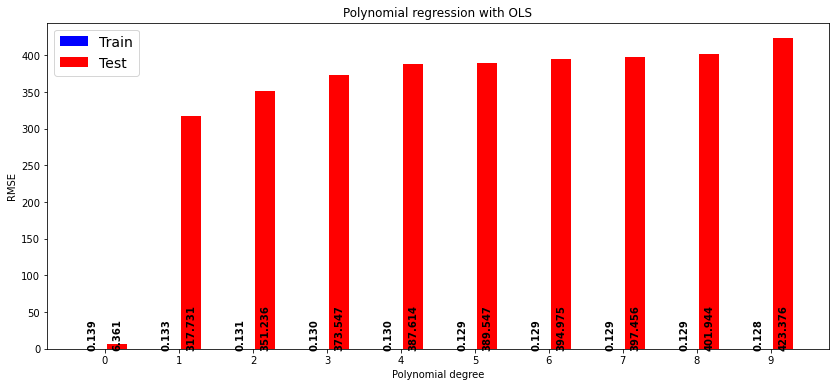

In [35]:
plot_train_test_rmse(rmse_ols_train, rmse_ols_test,
                     title="Polynomial regression with OLS", xlabel="Polynomial degree", ylim=1.5, text_y=0.1)

2D

In [36]:
x_train, y_train, x_test, y_test = split_training_test(x, y, 0.8)
weights = []
for i in range(2, 12):
    model = PolynomModel(i)
    model.fit(x_train, y_train)
    weight = model.OLS(0.001)
    weights.append((i, weight))

In [37]:
rmse_ols_train = []
rmse_ols_test = []


for i, w in weights:
    # compute RMSE
    pol_train = PolynomModel(i)
    pol_train.fit(x_train, y_train)

    pol_test = PolynomModel(i)
    pol_test.fit(x_test, y_test)

    train_result = pol_train.RMSE(pol_train.y, pol_train.regressao_polinomial(pol_train.x, w))
    test_result = pol_test.RMSE(pol_test.y, pol_test.regressao_polinomial(pol_test.x, w))

    # store RMSE
    rmse_ols_train.append(train_result)
    rmse_ols_test.append(test_result)

    print("Grandeza: {} RMSE train: {} RMSE test: {}".format(i, train_result, test_result))

Grandeza: 2 RMSE train: 0.14156861383664185 RMSE test: 2.8877084760933736
Grandeza: 3 RMSE train: 0.13811817699719547 RMSE test: 3.762827280394175
Grandeza: 4 RMSE train: 0.13750959326757484 RMSE test: 4.19171939401066
Grandeza: 5 RMSE train: 0.13729491234012117 RMSE test: 4.462810564594295
Grandeza: 6 RMSE train: 0.13713098780961674 RMSE test: 4.636952996558576
Grandeza: 7 RMSE train: 0.13701911367094075 RMSE test: 4.751011216827904
Grandeza: 8 RMSE train: 0.13694439866405278 RMSE test: 4.831180434065161
Grandeza: 9 RMSE train: 0.13688359140842538 RMSE test: 4.8916944349778975
Grandeza: 10 RMSE train: 0.13681663931763807 RMSE test: 4.938802873688465
Grandeza: 11 RMSE train: 0.1367338670605957 RMSE test: 4.97578529609379


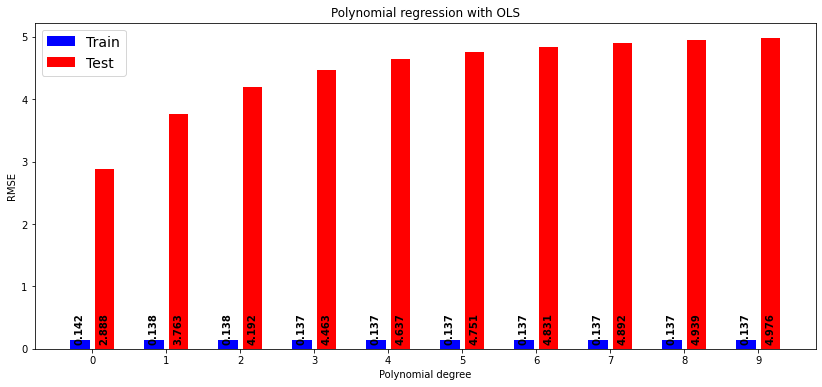

In [38]:
plot_train_test_rmse(rmse_ols_train, rmse_ols_test,
                     title="Polynomial regression with OLS", xlabel="Polynomial degree", ylim=1.5, text_y=0.1)